# Compare BP entropy against quimb tensor networks exact contractions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tnmpa import KSAT, BeliefPropagation

In [3]:
from quimb.tensor import COPY_tensor
import quimb.tensor as qtn

In [4]:
import random
import numpy as np

In [5]:
# paramter the controls the complexity of the problem, ratio between number of clauses and number of variables
# for alpha > 3.5 BP should start to fail
alpha = 1.0

# number of variables
N = 30

# numer of clauses
M = int(alpha * N)

# K of K-SAT
K = 3

In [6]:
seed = 0
instance = KSAT(N, M, K, seed=seed)

In [7]:
ksol_sp = BeliefPropagation(instance)
status = ksol_sp.MP(ksol_sp.envs_tensors, ksol_sp.instance, tol=1e-13)
status["bp_converged"], status["max_distance"]

(True, 7.643885524544203e-14)

In [8]:
print("Approximate BP entropy per varible:", ksol_sp.entropy / N)

Approximate BP entropy per varible: 0.5294099536184316


In [9]:
tn = instance.hyper_tn()

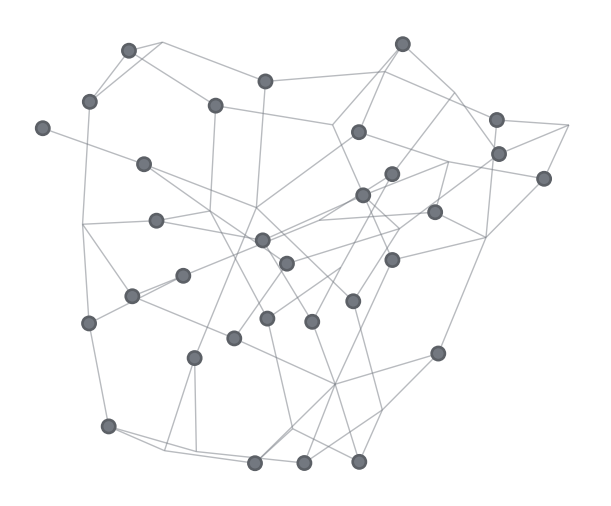

In [10]:
tn.draw()

In [11]:
print("Exact entropy per varible:", np.log(tn.contract(output_inds=())) / N)

Exact entropy per varible: 0.5349343401489466
